### Data

In [1]:
df = pd.read_pickle('data/df.pkl')
df[:2]

,AuthorID,Author,Date,Content,Attachments,Reactions,Date_day,Date_month,Date_quarter,id1,Channel1,Channel2,Channel2_img,flg_bot,Content2,cnt_messages,cnt_reactions,cnt_attachments,cnt_words,cnt_chars,flg_join
30165,451343325018980353,sheridan_oceanprotocol,2019-08-20 19:55:00,Joined the server.,NaN,NaN,2019-08-20,2019-08,2019Q3,30165,GENERAL,general-chat,💭,0,joined the server,0,0,0,3,18,1
30166,236850565382930432,kremalicious,2019-08-20 22:22:00,Joined the server.,NaN,NaN,2019-08-20,2019-08,2019Q3,30166,GENERAL,general-chat,💭,0,joined the server,0,0,0,3,18,1


### Number of messages

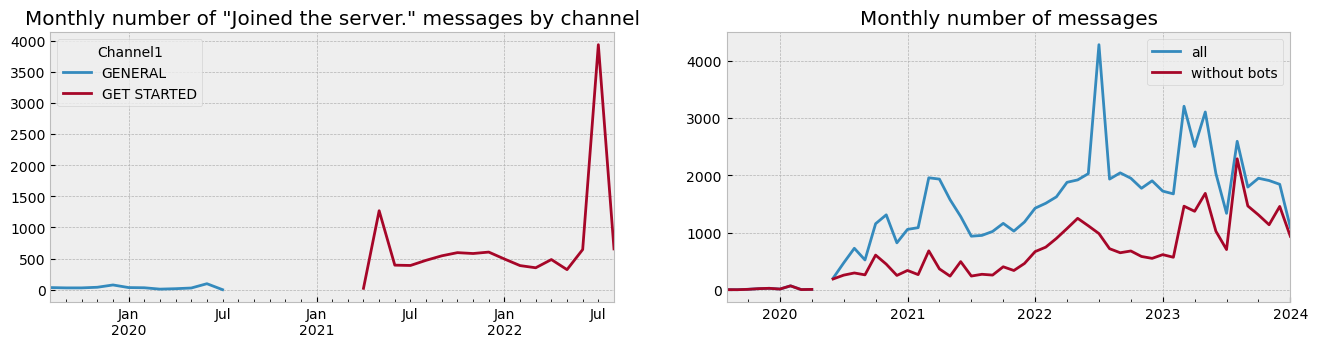

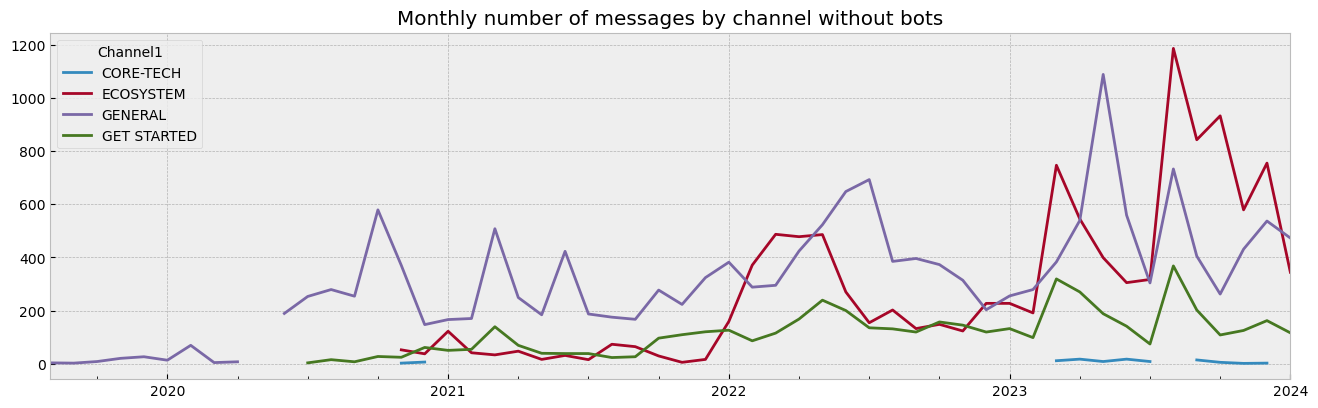

In [2]:
f0 = df.Date < '2024-02-01'
f1 = df['flg_join'] == 0
f2 = df['flg_bot'] == 0

_, ax = plt.subplots(1,2, figsize = (16,3.5))
df_st = df[~f1].groupby(['Date','Channel1']).size().unstack().resample('M').sum().replace(0, np.nan)
_ = df_st.plot(ax = ax[0], title = 'Monthly number of "Joined the server." messages by channel', xlabel = '')

df_st = df[f0&f1].groupby(['Date']).size().resample('M').sum().reset_index().rename(columns = {0: 'all'}).set_index('Date')
df_st['without bots'] = df[f0&f1&f2].groupby(['Date']).size().resample('M').sum()
_ = df_st.replace(0, np.nan).plot(ax = ax[1], title = 'Monthly number of messages', xlabel = '')

df_st = df[f0&f1&f2].groupby(['Date','Channel1']).size().unstack().resample('M').sum().replace(0, np.nan)
_ = df_st.plot(figsize = (16,4.5), title = 'Monthly number of messages by channel without bots', xlabel = '')

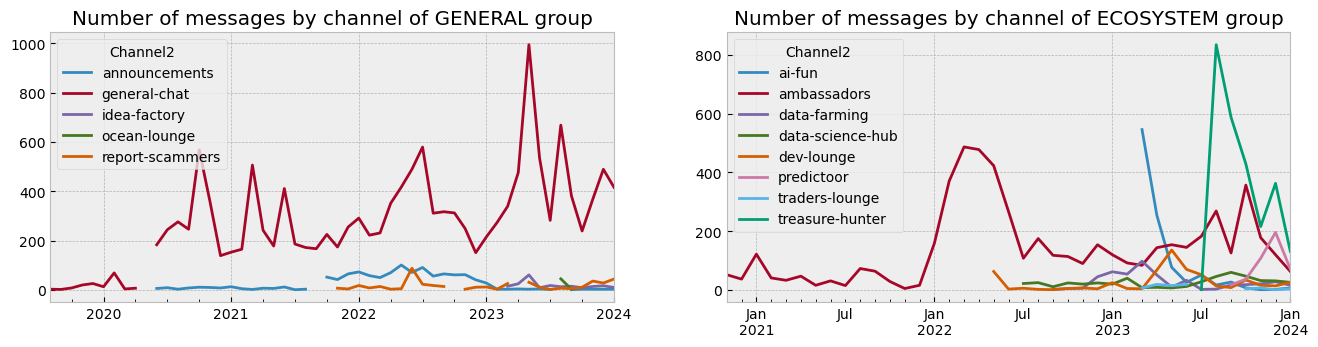

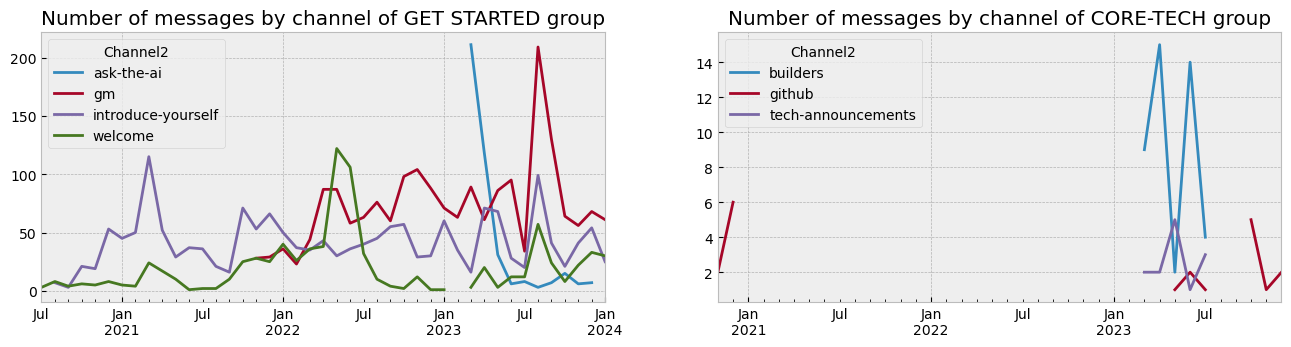

In [3]:
filt = f0&f1&f2

_, ax = plt.subplots(1,2, figsize = (16,3.5))
c = 'GENERAL'
f3 = df['Channel1'] == c
df_st = df[filt&f3].groupby(['Date','Channel2']).size().unstack().resample('M').sum().replace(0, np.nan)
_ = df_st.plot(ax = ax[0], title = f'Number of messages by channel of {c} group', xlabel = '')
c = 'ECOSYSTEM'
f3 = df['Channel1'] == c
df_st = df[filt&f3].groupby(['Date','Channel2']).size().unstack().resample('M').sum().replace(0, np.nan)
_ = df_st.plot(ax = ax[1], title = f'Number of messages by channel of {c} group', xlabel = '')


_, ax = plt.subplots(1,2, figsize = (16,3.5))
c = 'GET STARTED'
f3 = df['Channel1'] == c
df_st = df[filt&f3].groupby(['Date','Channel2']).size().unstack().resample('M').sum().replace(0, np.nan)
_ = df_st.plot(ax = ax[0], title = f'Number of messages by channel of {c} group', xlabel = '')
c = 'CORE-TECH'
f3 = df['Channel1'] == c
df_st = df[filt&f3].groupby(['Date','Channel2']).size().unstack().resample('M').sum().replace(0, np.nan)
_ = df_st.plot(ax = ax[1], title = f'Number of messages by channel of {c} group', xlabel = '')